In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, plot_importance as xg_importance
from lightgbm import LGBMClassifier, plot_importance as lgb_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import plotly.express as px


In [10]:
dt_credit = pd.read_csv('../content/creditcard.csv')

In [11]:
dt_credit.shape

(65453, 31)

In [12]:
dt_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65453 entries, 0 to 65452
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    65453 non-null  int64  
 1   V1      65453 non-null  float64
 2   V2      65453 non-null  float64
 3   V3      65453 non-null  float64
 4   V4      65453 non-null  float64
 5   V5      65453 non-null  float64
 6   V6      65453 non-null  float64
 7   V7      65453 non-null  float64
 8   V8      65453 non-null  float64
 9   V9      65453 non-null  float64
 10  V10     65453 non-null  float64
 11  V11     65452 non-null  float64
 12  V12     65452 non-null  float64
 13  V13     65452 non-null  float64
 14  V14     65452 non-null  float64
 15  V15     65452 non-null  float64
 16  V16     65452 non-null  float64
 17  V17     65452 non-null  float64
 18  V18     65452 non-null  float64
 19  V19     65452 non-null  float64
 20  V20     65452 non-null  float64
 21  V21     65452 non-null  float64
 22

In [13]:
dt_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,...,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000
mean,33429.846867,-0.240575,-0.012987,0.684068,0.171729,-0.266835,0.103221,-0.113163,0.059434,0.037196,...,-0.028511,-0.106841,-0.039098,0.005598,0.136732,0.019958,0.002181,0.004243,96.276149,0.002582
std,14078.168886,1.857128,1.649806,1.426716,1.378742,1.388857,1.306443,1.254939,1.223332,1.170955,...,0.729616,0.637402,0.603012,0.596708,0.439030,0.497424,0.381480,0.322063,270.242777,0.050749
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,27748.000000,-1.000865,-0.585921,0.197913,-0.723647,-0.884703,-0.636487,-0.602981,-0.142531,-0.662885,...,-0.226897,-0.526780,-0.179573,-0.326243,-0.127572,-0.329428,-0.062871,-0.005887,7.680000,0.000000
50%,36941.000000,-0.243460,0.075028,0.774169,0.189237,-0.298678,-0.148843,-0.073032,0.065169,-0.057666,...,-0.062061,-0.081680,-0.051837,0.061257,0.174456,-0.076200,0.009404,0.022739,26.220000,0.000000
75%,43906.000000,1.153819,0.730504,1.408066,1.054661,0.272863,0.495135,0.422151,0.342671,0.695866,...,0.114460,0.308386,0.078933,0.402812,0.423146,0.296759,0.082485,0.076182,88.122500,0.000000
max,51591.000000,1.960497,18.183626,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [25]:
dt_credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [26]:
dt_credit.nunique().sort_values(ascending=True)

Class         2
Amount    15195
Time      31542
V16       64043
V28       64043
V27       64043
V26       64043
V25       64043
V24       64043
V23       64043
V22       64043
V21       64043
V20       64043
V19       64043
V18       64043
V17       64043
V15       64043
V14       64043
V13       64043
V12       64043
V11       64043
V1        64044
V10       64044
V9        64044
V8        64044
V7        64044
V6        64044
V5        64044
V4        64044
V2        64044
V3        64044
dtype: int64

In [14]:
dt_credit.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [15]:
dt_credit.iloc[:, -1].value_counts()

0.0    65283
1.0      169
Name: Class, dtype: int64

<Axes: >

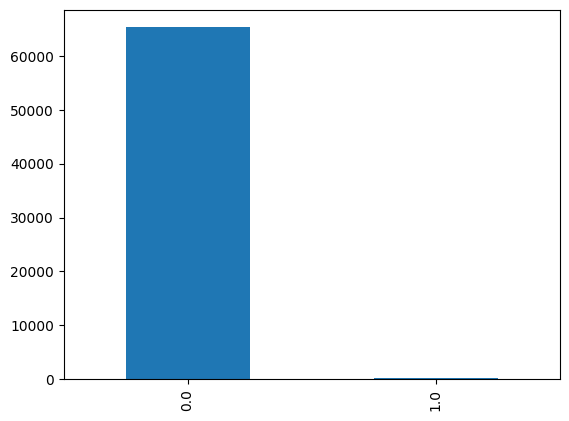

In [16]:
dt_credit.iloc[:, -1].value_counts().plot(kind='bar')

In [17]:
dt_credit.iloc[:, -1].value_counts() / dt_credit.iloc[:, -1].count() * 100

0.0    99.741796
1.0     0.258204
Name: Class, dtype: float64

In [18]:
X = dt_credit.iloc[:, :-1]
y = dt_credit.iloc[:, -1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [20]:
print(y_train.value_counts() / y_train.count() * 100)
print(y_test.value_counts() / y_test.count() * 100)

0.0    99.733138
1.0     0.266862
Name: Class, dtype: float64
0.0    99.767769
1.0     0.232231
Name: Class, dtype: float64


In [21]:
tmp = dt_credit['Class'].value_counts().to_frame().reset_index()
tmp['Percent(%)'] = tmp["Class"].apply(lambda x : round(100*float(x) / len(dt_credit), 2))
tmp = tmp.rename(columns = {"index" : "Target", "Class" : "Count"})

tmp

,Target,Count,Percent(%)
0,0.0,65283,99.74
1,1.0,169,0.26


In [22]:
x_data = dt_credit.loc[:, 'V1' : 'V28']
y_data = dt_credit.loc[:, 'Class']
print(x_data.shape)
print(y_data.shape)

(65453, 28)
(65453,)


In [23]:
shuffle_index = np.random.permutation(len(dt_credit))
x_data = x_data.values[shuffle_index]
y_data = y_data.values[shuffle_index]

n_train = int(len(x_data) * 0.7)

x_train = x_data[:n_train]
y_train = y_data[:n_train]
x_test = x_data[n_train:]
y_test = y_data[n_train:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(45817, 28)
(45817,)
(19636, 28)
(19636,)


In [24]:
pd.DataFrame([[sum(y_train == 0), sum(y_test == 0)], [sum(y_train == 1), sum(y_test == 1)]],
             columns=['train', 'test'], index=['0 (non-fraud)', '1 (fraud)'])

,train,test
0 (non-fraud),45701,19582
1 (fraud),115,54


Text(0.5, 0, 'Class')

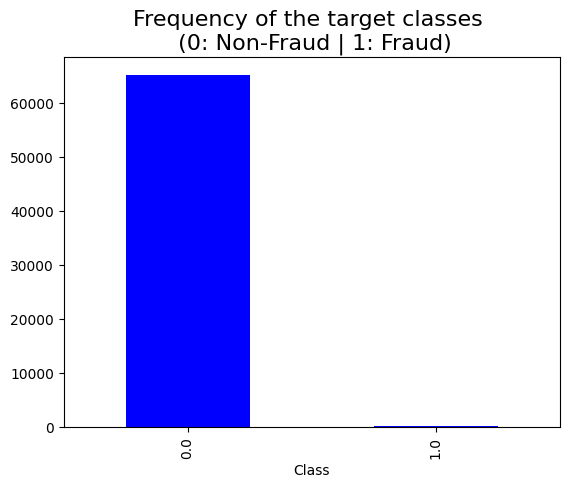

In [27]:
dt_credit["Class"].value_counts().plot(kind="bar",color="blue")
plt.title("Frequency of the target classes \n (0: Non-Fraud | 1: Fraud)", size = 16)
plt.xlabel("Class")

In [29]:
fraud=dt_credit[dt_credit['Class']==1]
len(fraud)

169


# Number of non-fraud cases

In [31]:
non_fraud=dt_credit[dt_credit['Class']==0]
len(non_fraud)

65283

In [32]:
fraud.Amount.describe()

count     169.000000
mean       94.895680
std       220.959331
min         0.000000
25%         1.000000
50%         7.610000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

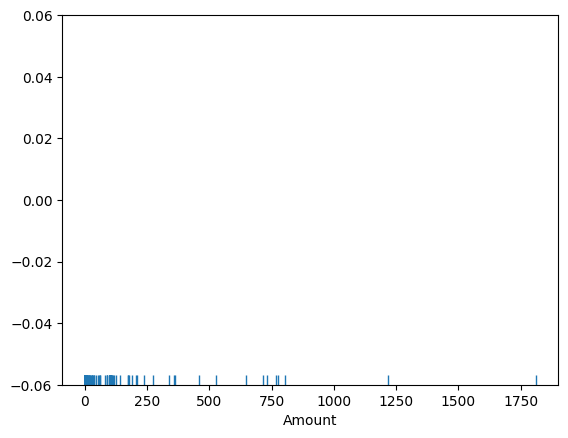

In [33]:
sns.rugplot(fraud['Amount']);

<Axes: xlabel='Amount', ylabel='Count'>

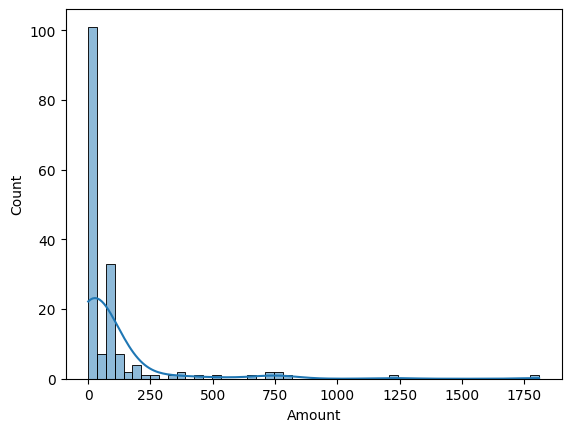

In [34]:
sns.histplot(fraud['Amount'], kde=True)

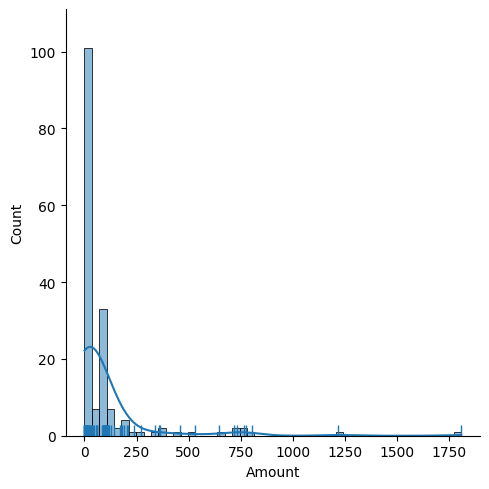

In [35]:
sns.displot(fraud['Amount'], kde=True, rug=True);

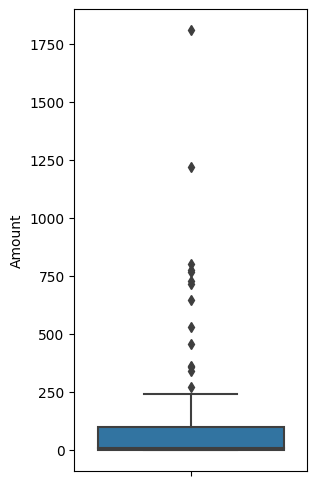

In [36]:
plt.figure(figsize = (3, 6))
sns.boxplot(y=fraud['Amount']);

In [37]:
non_fraud.Amount.describe()

count    65283.000000
mean        96.279722
std        270.360076
min          0.000000
25%          7.680000
50%         26.250000
75%         88.000000
max      19656.530000
Name: Amount, dtype: float64

In [38]:
non_fraud.Amount.describe()

count    65283.000000
mean        96.279722
std        270.360076
min          0.000000
25%          7.680000
50%         26.250000
75%         88.000000
max      19656.530000
Name: Amount, dtype: float64

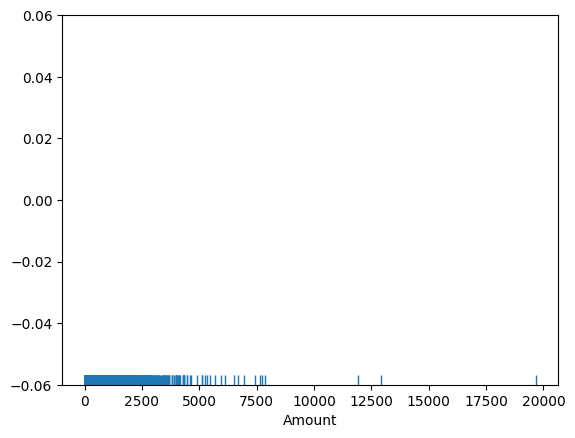

In [39]:
sns.rugplot(non_fraud['Amount']);

<Axes: xlabel='Amount', ylabel='Count'>

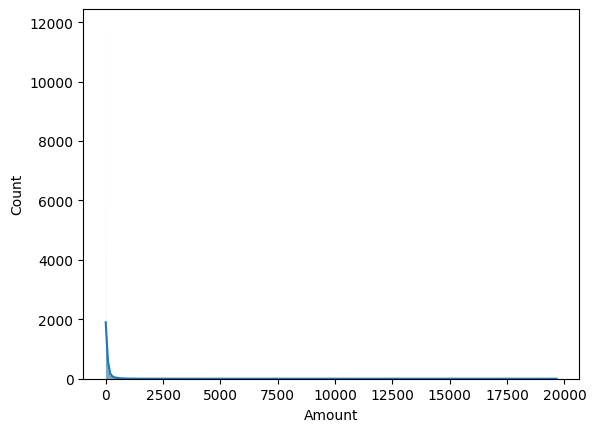

In [40]:
sns.histplot(non_fraud['Amount'], kde=True)

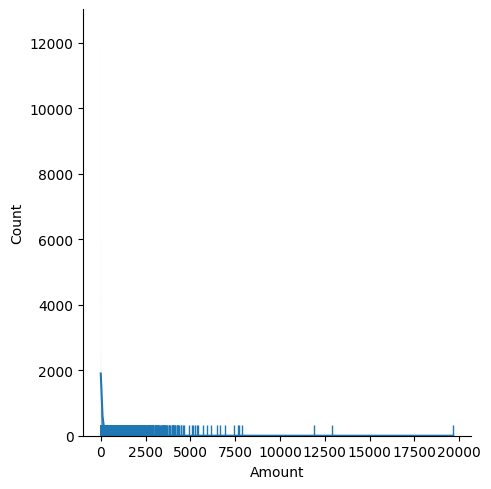

In [41]:
sns.displot(non_fraud['Amount'], kde=True, rug=True);

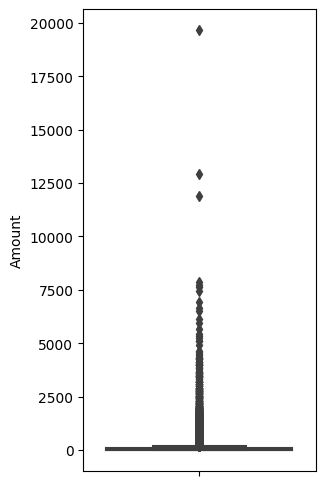

In [42]:
plt.figure(figsize = (3, 6))
sns.boxplot(y=non_fraud['Amount']);



# Check outliers and transaction count

In [44]:
outliers = len(fraud)/float(len(non_fraud))

print('Outlier:', outliers)
print('Non-Fraud Transactions: {}'.format(len(dt_credit[dt_credit['Class'] == 0])))
print('Fraud Transactions: {}'.format(len(dt_credit[dt_credit['Class'] == 1])))


Outlier: 0.002588729071887015
Non-Fraud Transactions: 65283
Fraud Transactions: 169



# Check distribution of data

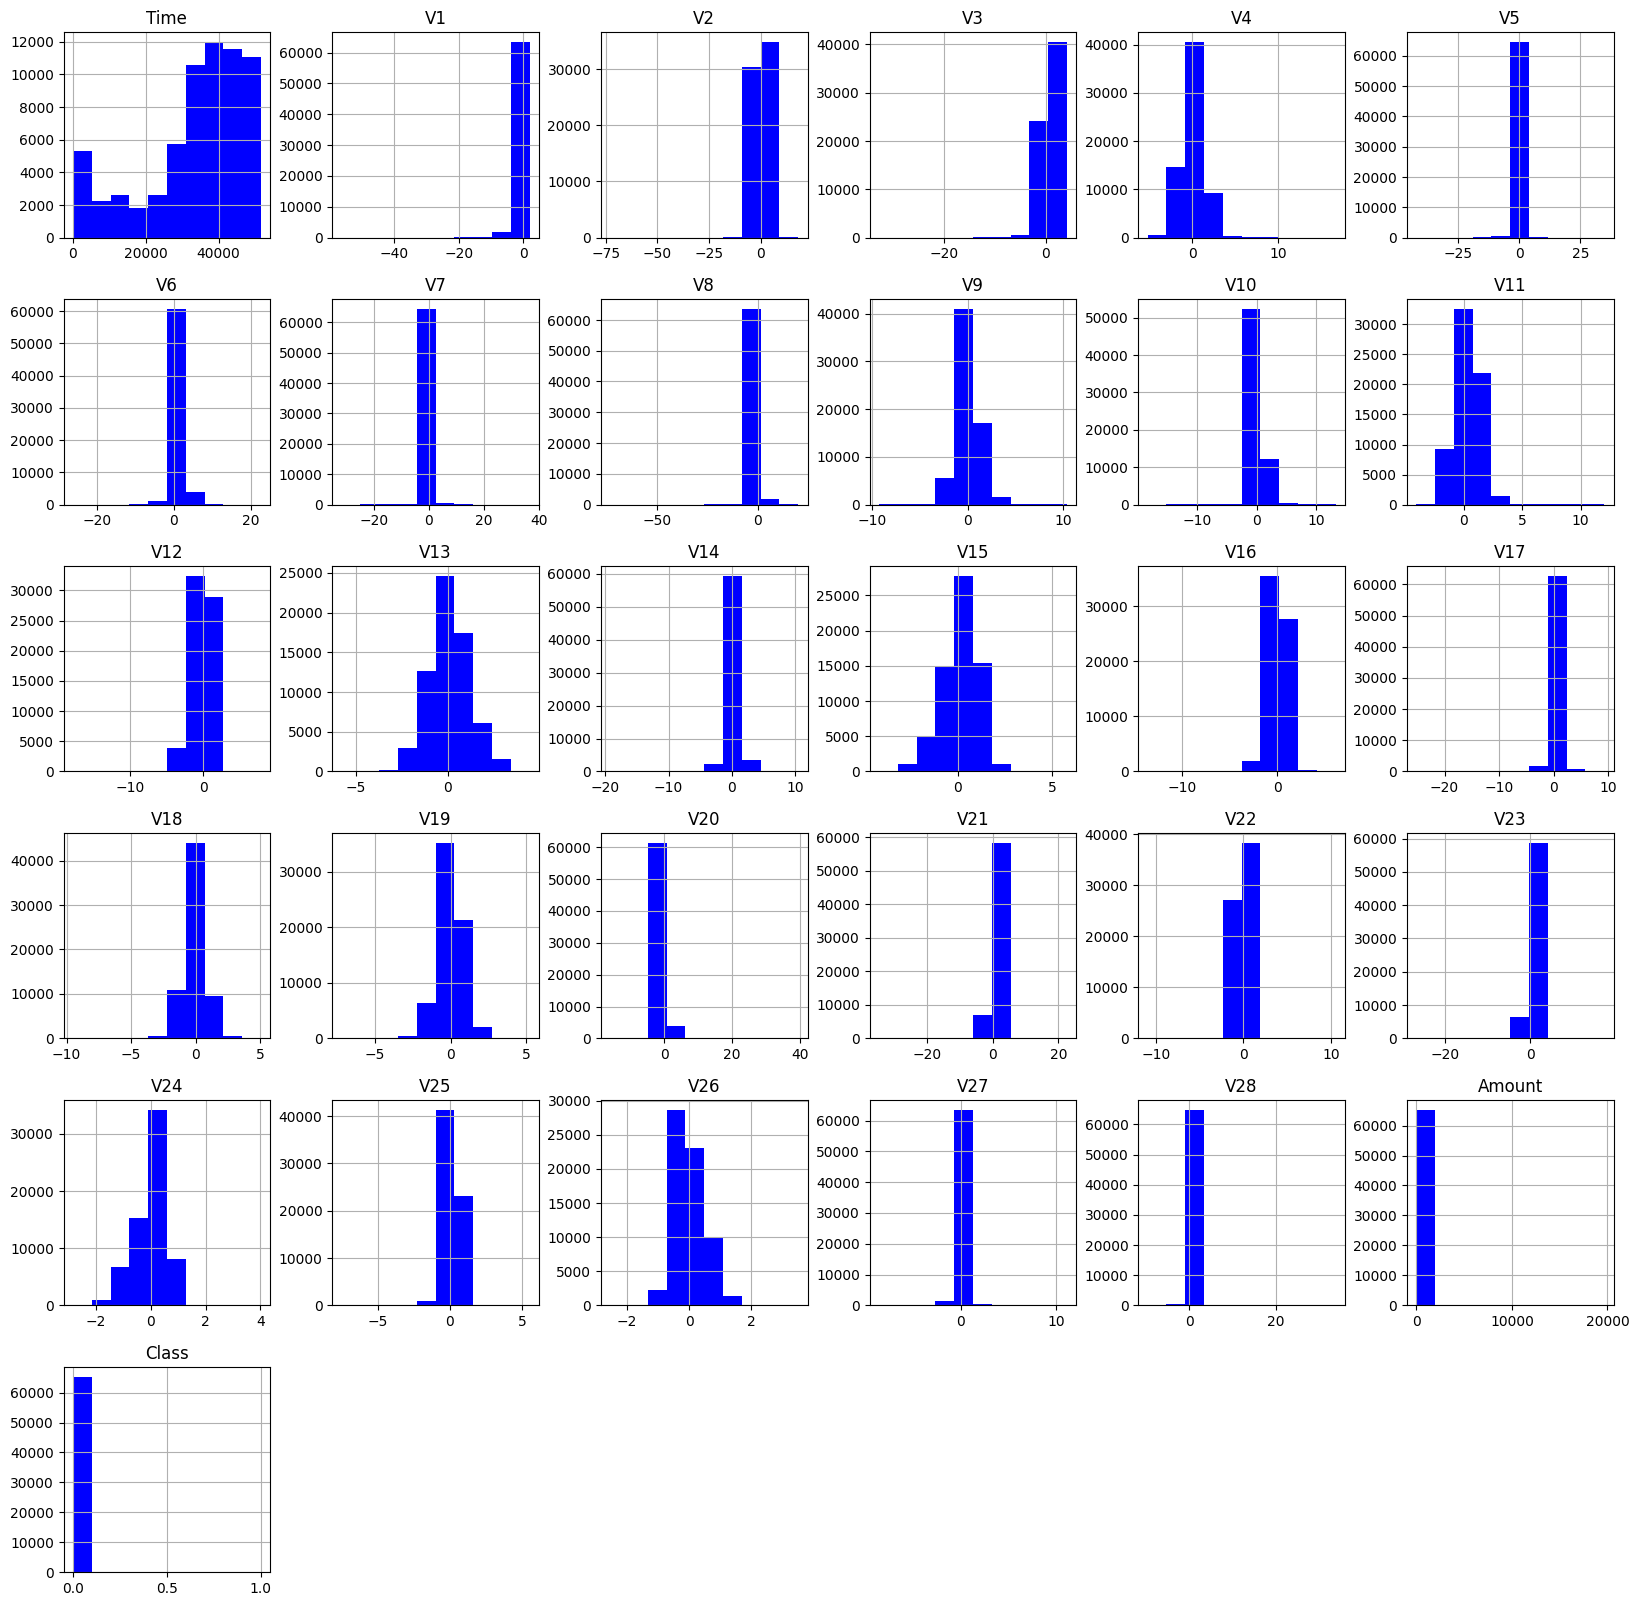

In [45]:
dt_credit.hist(figsize=(20,20),color='blue')
plt.show()

# Time vs Amount of Fraud cases

<Axes: xlabel='Time', ylabel='Amount'>

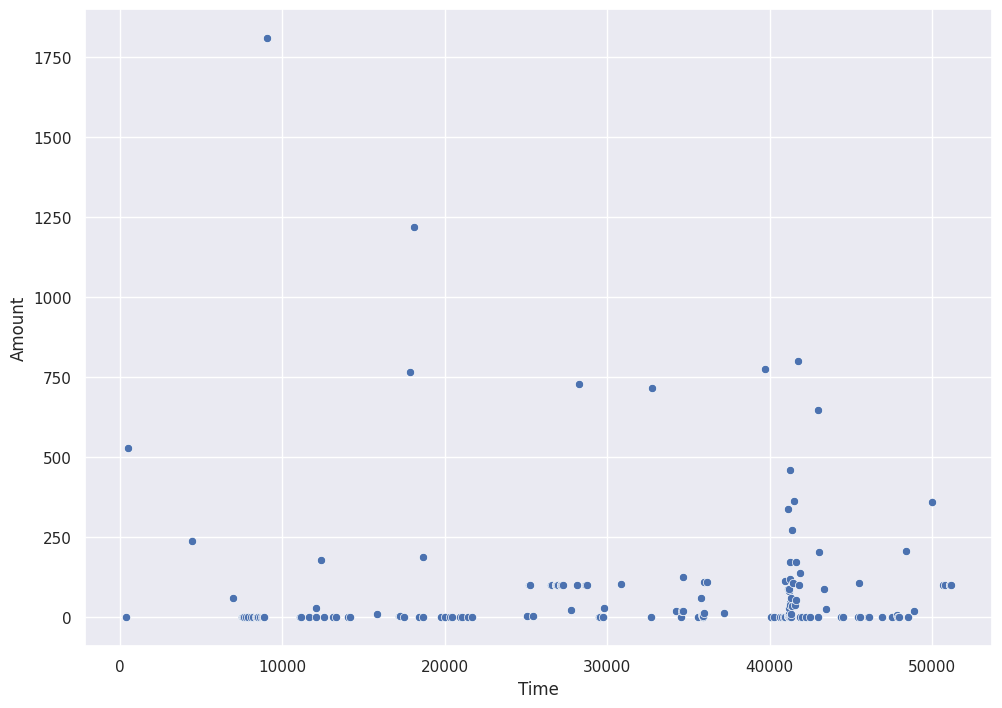

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=fraud.Time,y=fraud.Amount)


# Time vs Amount of Non-Fraud cases

<Axes: xlabel='Time', ylabel='Amount'>

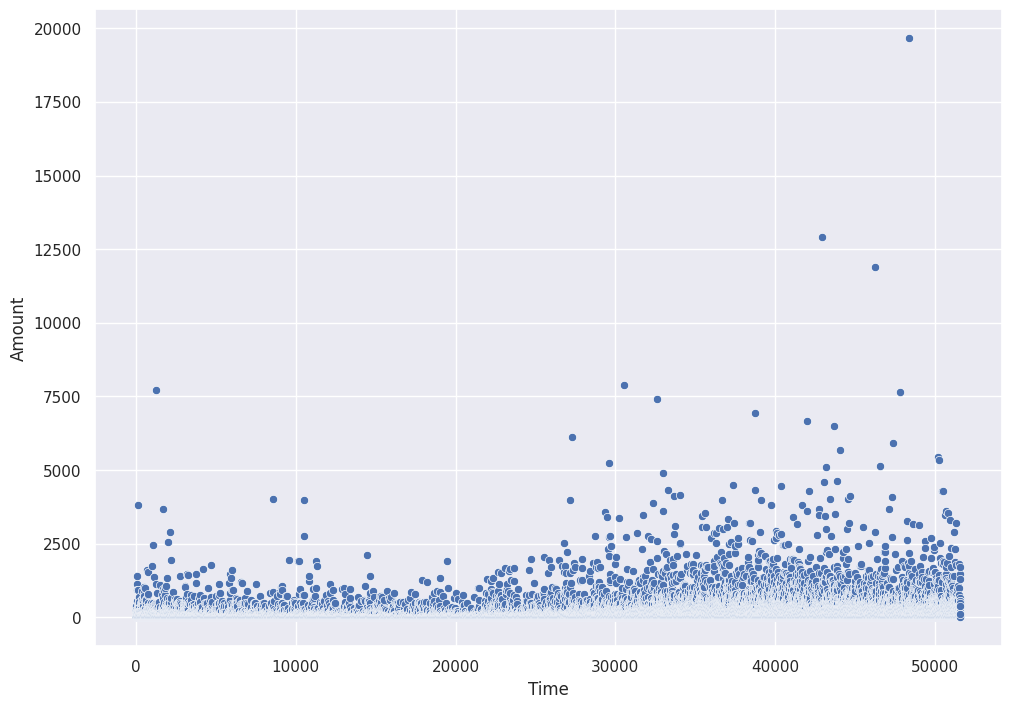

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=non_fraud.Time, y=non_fraud.Amount)



# Time of transaction vs Amount by Class plot

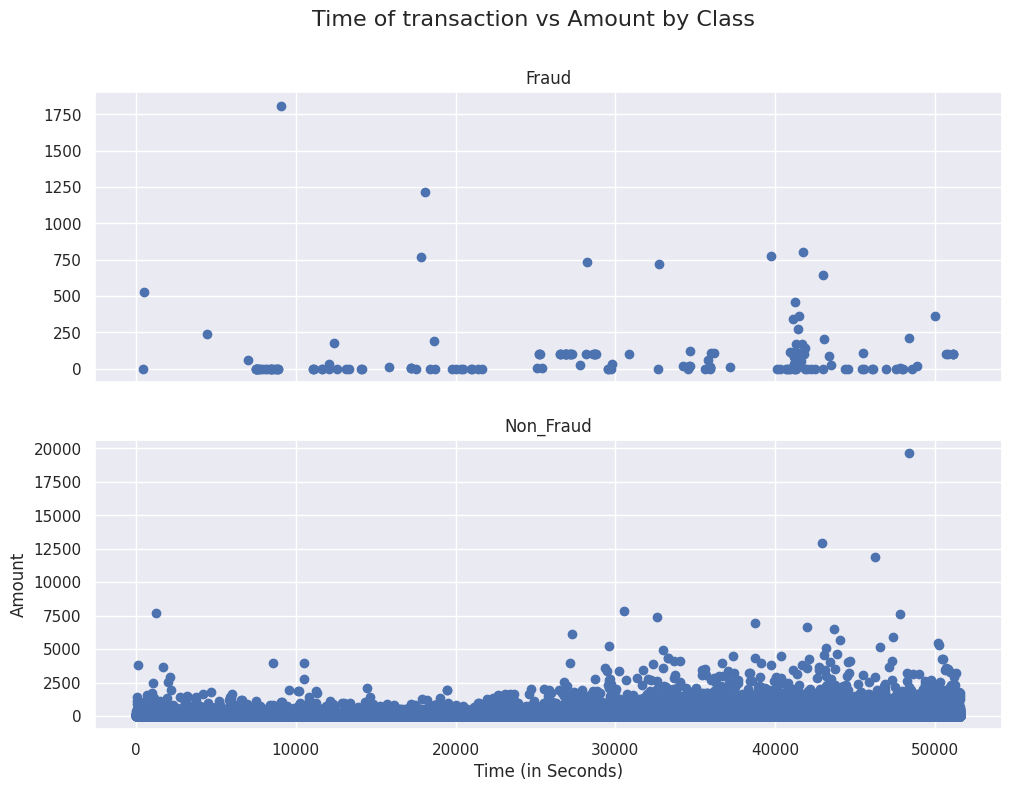

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
y,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
y.suptitle('Time of transaction vs Amount by Class', size = 16)
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(non_fraud.Time, non_fraud.Amount)
ax2.set_title('Non_Fraud')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<Axes: >

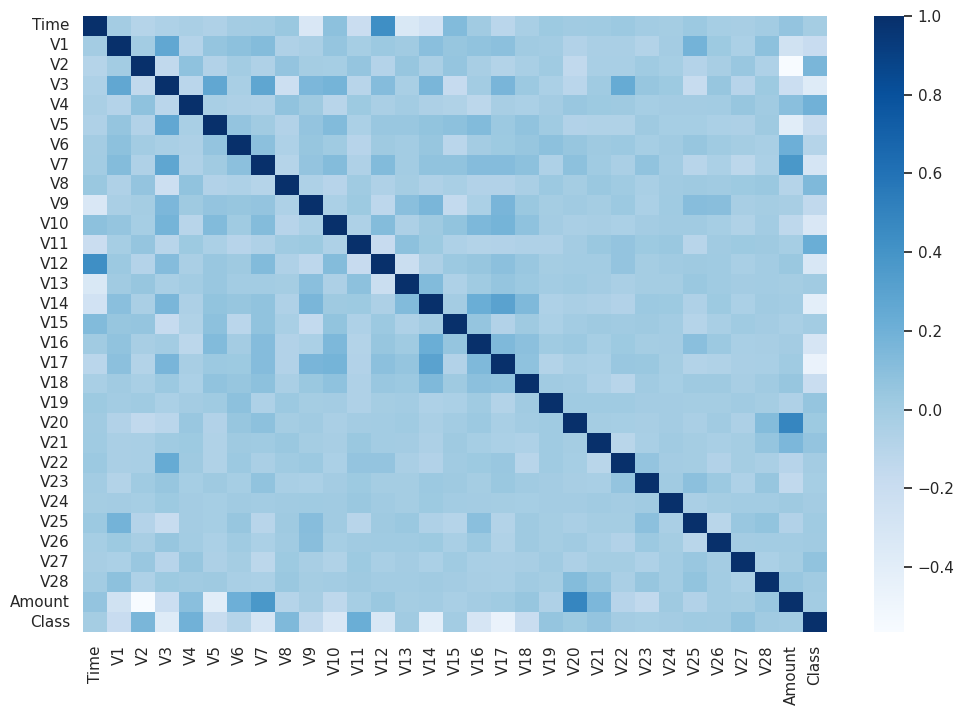

In [53]:
plt.figure(figsize=(12,8))
corr=dt_credit.corr()
sns.heatmap(corr,cmap="Blues")

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
import xgboost as xgb
import lightgbm as lgb

In [56]:
target = dt_credit.iloc[:1, 30: ].columns
features = dt_credit.iloc[:, 1:30].columns
print(features)
print(target)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [57]:
target_df = dt_credit[target]
features_df = dt_credit[features]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, train_size=0.70, test_size=0.30, random_state=1)

In [71]:
logistic_model = LogisticRegression()
logistic_model.fit(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
logistic_prediction = logistic_model.predict(X_test)

In [73]:
accuracy_score(y_test,logistic_prediction)

0.998879608881646

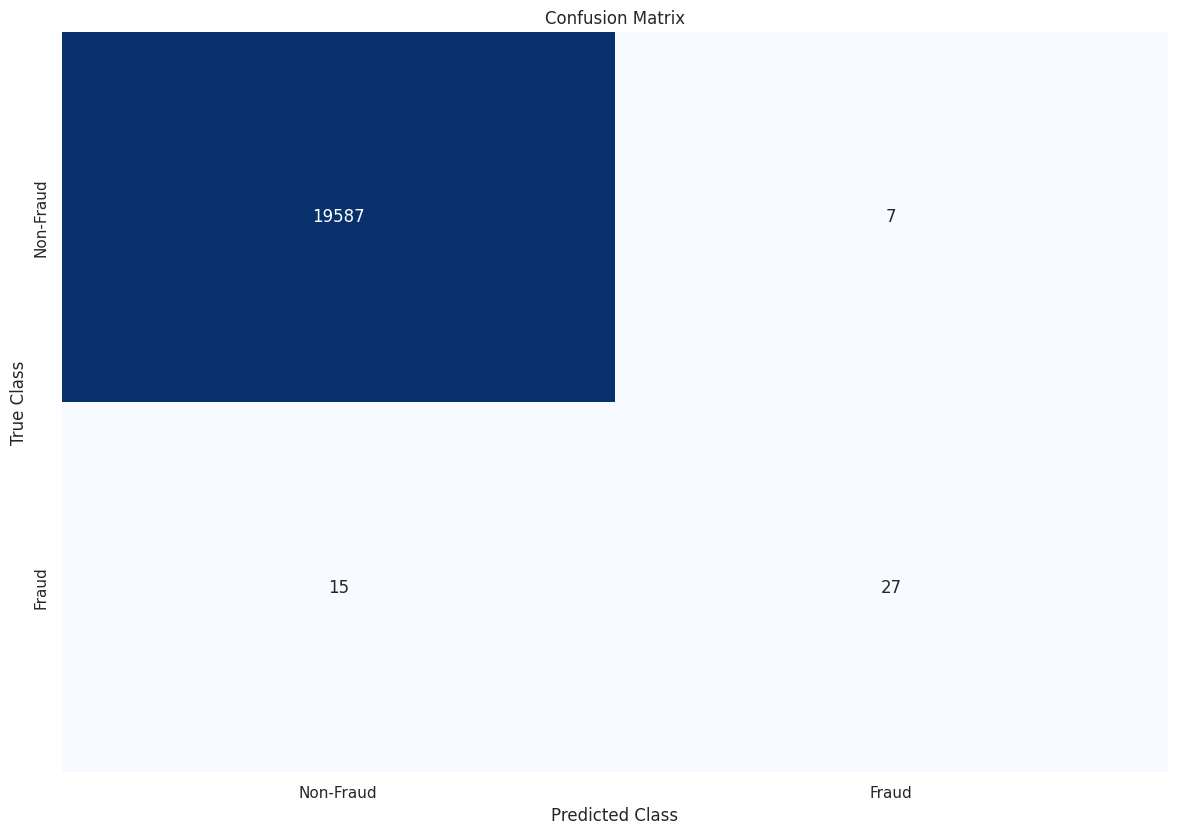

In [74]:
class_f = ['Non-Fraud', 'Fraud']
matrix = confusion_matrix(y_test, logistic_prediction)

lr_cm_df = pd.DataFrame(matrix, index=class_f, columns=class_f)

sns.heatmap(lr_cm_df, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


# Precision, recall, f1-score of the model

In [75]:
print(classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19594
         1.0       0.79      0.64      0.71        42

    accuracy                           1.00     19636
   macro avg       0.90      0.82      0.85     19636
weighted avg       1.00      1.00      1.00     19636




# Fit Random forest model

In [77]:
rf_model = RandomForestClassifier()
rf_model.fit(X_test,y_test)

<ipython-input-77-f54c350e7a96>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_test,y_test)


RandomForestClassifier()

In [78]:
rf_prediction = rf_model.predict(X_test)

# Check accuracy of the model

In [79]:
accuracy_score(y_test,rf_prediction)

1.0

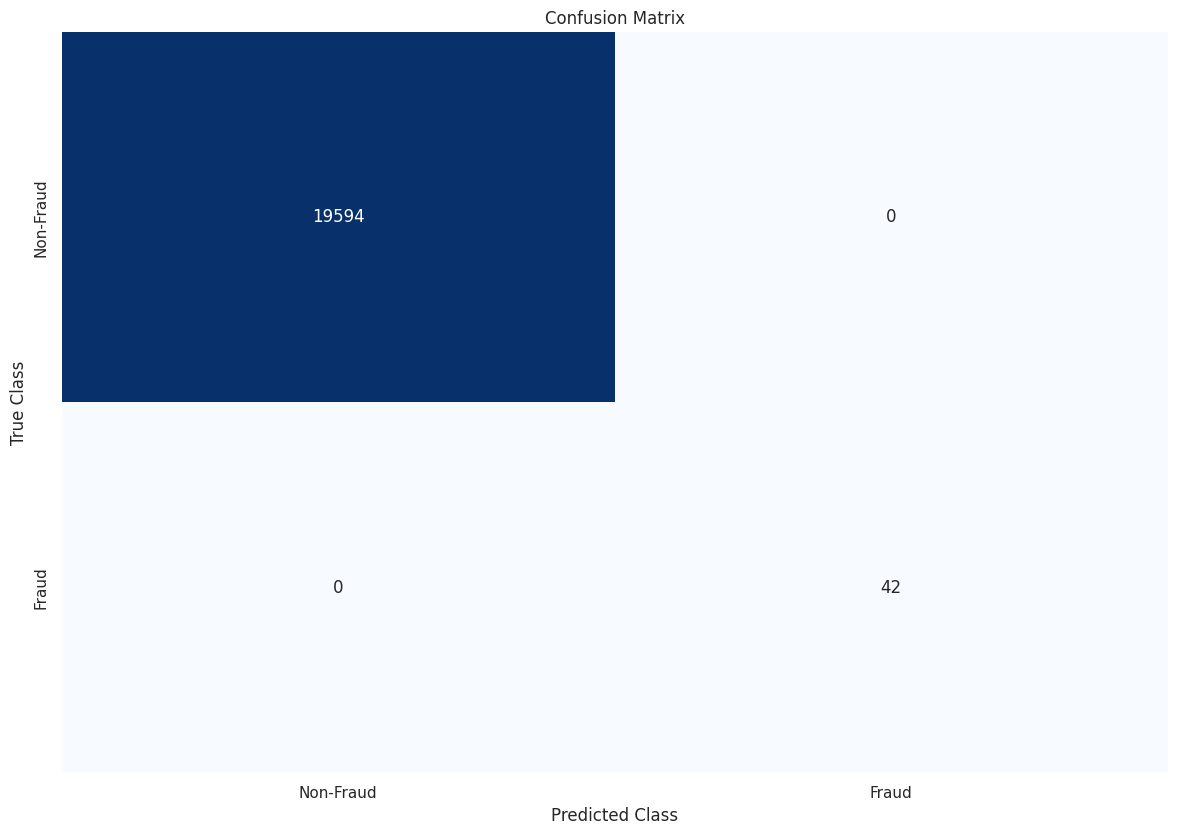

In [80]:
class_f = ['Non-Fraud', 'Fraud']
matrix = confusion_matrix(y_test, rf_prediction)

rf_cm_df = pd.DataFrame(matrix, index=class_f, columns=class_f)

sns.heatmap(rf_cm_df, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# Precision, recall, f1-score of the model

In [81]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19594
         1.0       1.00      1.00      1.00        42

    accuracy                           1.00     19636
   macro avg       1.00      1.00      1.00     19636
weighted avg       1.00      1.00      1.00     19636



In [83]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [84]:
knn_prediction = knn_model.predict(X_test)

In [85]:
accuracy_score(y_test,knn_prediction)

0.9990323894886942

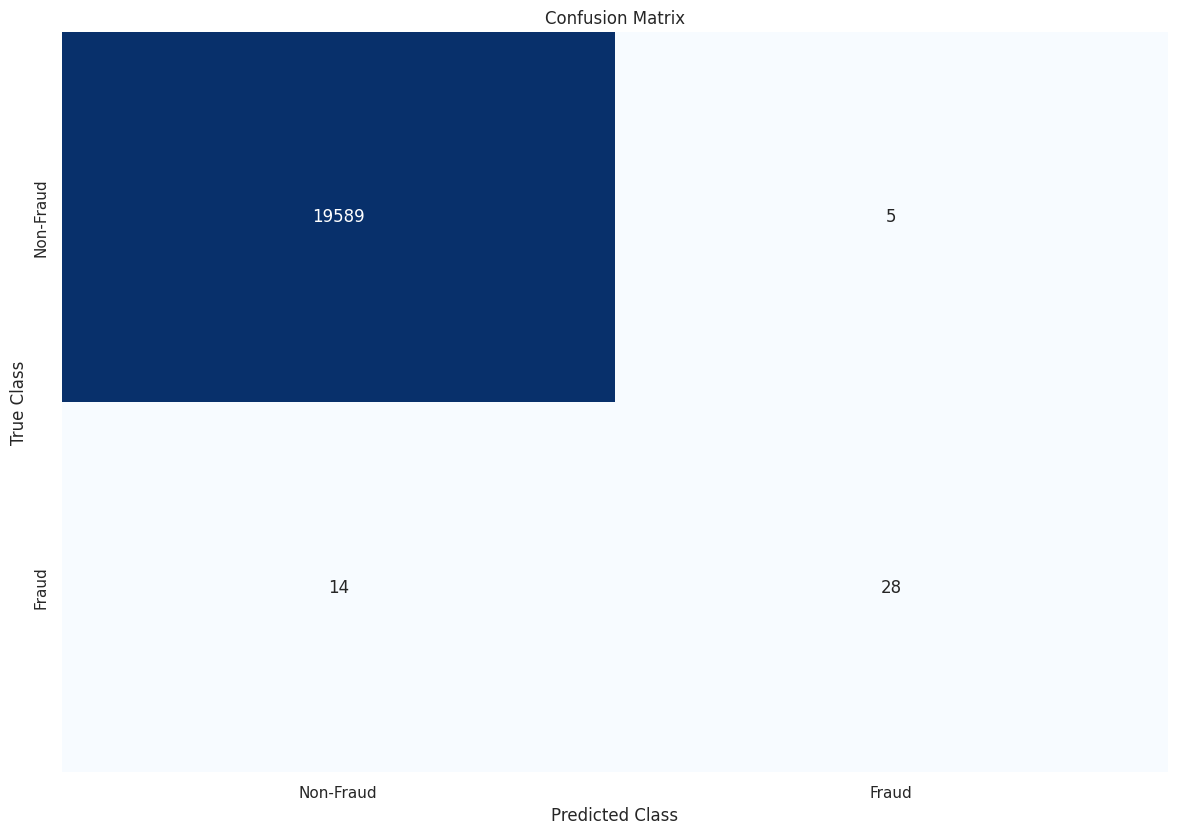

In [86]:
class_f = ['Non-Fraud', 'Fraud']
matrix = confusion_matrix(y_test, knn_prediction)

knn_cm_df = pd.DataFrame(matrix, index=class_f, columns=class_f)

sns.heatmap(knn_cm_df, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [87]:
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19594
         1.0       0.85      0.67      0.75        42

    accuracy                           1.00     19636
   macro avg       0.92      0.83      0.87     19636
weighted avg       1.00      1.00      1.00     19636

